In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt


iris = datasets.load_iris()
inputs = iris.data[:,2:4]
labels = iris.target


In [2]:
for index in range(len(labels)):
    
    if labels[index] == 0:
        pass
    else :
        labels[index] = 1
    

In [3]:
inputs = np.array(inputs)
labels = np.array(labels)
labels = labels.reshape(150,1)

dataset = np.append(inputs, labels, axis=1)

print(dataset)

[[1.4 0.2 0. ]
 [1.4 0.2 0. ]
 [1.3 0.2 0. ]
 [1.5 0.2 0. ]
 [1.4 0.2 0. ]
 [1.7 0.4 0. ]
 [1.4 0.3 0. ]
 [1.5 0.2 0. ]
 [1.4 0.2 0. ]
 [1.5 0.1 0. ]
 [1.5 0.2 0. ]
 [1.6 0.2 0. ]
 [1.4 0.1 0. ]
 [1.1 0.1 0. ]
 [1.2 0.2 0. ]
 [1.5 0.4 0. ]
 [1.3 0.4 0. ]
 [1.4 0.3 0. ]
 [1.7 0.3 0. ]
 [1.5 0.3 0. ]
 [1.7 0.2 0. ]
 [1.5 0.4 0. ]
 [1.  0.2 0. ]
 [1.7 0.5 0. ]
 [1.9 0.2 0. ]
 [1.6 0.2 0. ]
 [1.6 0.4 0. ]
 [1.5 0.2 0. ]
 [1.4 0.2 0. ]
 [1.6 0.2 0. ]
 [1.6 0.2 0. ]
 [1.5 0.4 0. ]
 [1.5 0.1 0. ]
 [1.4 0.2 0. ]
 [1.5 0.2 0. ]
 [1.2 0.2 0. ]
 [1.3 0.2 0. ]
 [1.4 0.1 0. ]
 [1.3 0.2 0. ]
 [1.5 0.2 0. ]
 [1.3 0.3 0. ]
 [1.3 0.3 0. ]
 [1.3 0.2 0. ]
 [1.6 0.6 0. ]
 [1.9 0.4 0. ]
 [1.4 0.3 0. ]
 [1.6 0.2 0. ]
 [1.4 0.2 0. ]
 [1.5 0.2 0. ]
 [1.4 0.2 0. ]
 [4.7 1.4 1. ]
 [4.5 1.5 1. ]
 [4.9 1.5 1. ]
 [4.  1.3 1. ]
 [4.6 1.5 1. ]
 [4.5 1.3 1. ]
 [4.7 1.6 1. ]
 [3.3 1.  1. ]
 [4.6 1.3 1. ]
 [3.9 1.4 1. ]
 [3.5 1.  1. ]
 [4.2 1.5 1. ]
 [4.  1.  1. ]
 [4.7 1.4 1. ]
 [3.6 1.3 1. ]
 [4.4 1.4 1. ]
 [4.5 1.5 

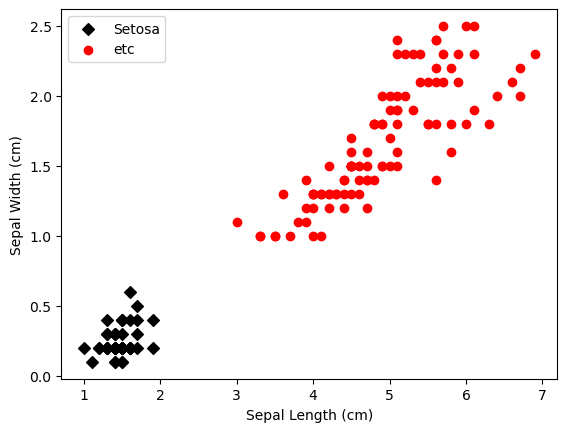

In [4]:
plt.scatter(
            
                dataset[:,0][dataset[...,2]==0],
                dataset[:,1][dataset[...,2]==0],
                marker = "D",
                color = "Black",
                label = "Setosa"

)

plt.scatter(
            
                dataset[:,0][dataset[...,2]==1],
                dataset[:,1][dataset[...,2]==1],
                marker = "o",
                color = "Red",
                label = "etc"
)



plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()

In [5]:
def set_weights(n):

    weights = np.random.randn(3, n)
    return weights

In [6]:
def calculate_r(label, y):
    
    return label - y


In [7]:
def calculate_output(inputs,weights):

    net = np.dot(weights.T,inputs)
    return np.heaviside(net,1)

In [8]:
def update_weights(inputs, weights, label, y):
    
    delta_W = calculate_r(label, y) * inputs
    
    weights = weights + delta_W
    
    return weights

In [18]:
n = 1
weights = set_weights(n)
epochs = 8
errors = []
for i in range(epochs):
    for index in range(len(inputs)):
        
        input_train = np.append(np.ones(1),inputs[index])
        input_train = input_train.reshape(3,1)
        output = calculate_output(input_train,weights)
        error = 0
        weights = update_weights(input_train, weights, labels[index], output)
        
        for j in range(len(inputs)):
            
            input_train = np.append(np.ones(1),inputs[j])
            input_train = input_train.reshape(3,1)
            output = calculate_output(input_train,weights)
            error += (labels[j][0]-output[0][0])**2
            
        errors.append(error)
            

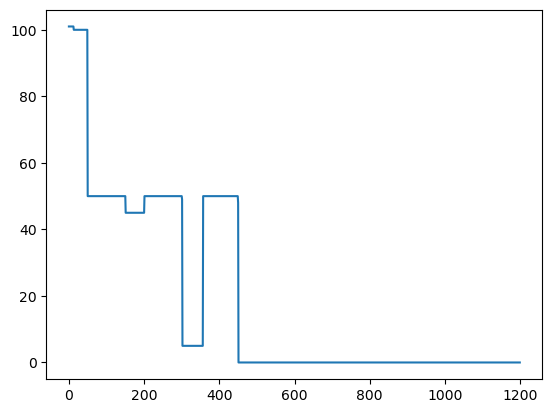

In [19]:
index = []

for i in range(0,150*epochs):
    index.append(i)
    
    
plt.plot(index,errors)
plt.show()

In [11]:
print(weights)

[[-4.83750957]
 [ 1.82452222]
 [ 1.42889695]]


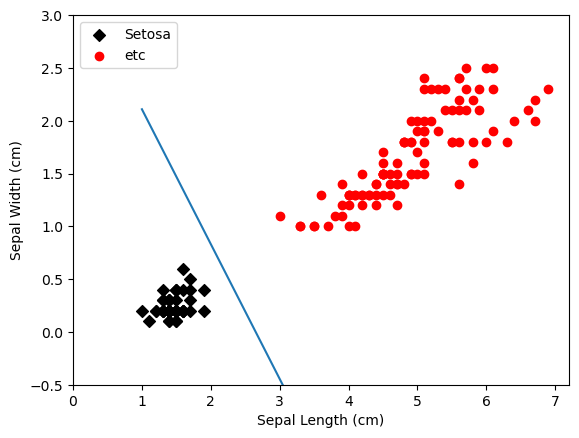

In [12]:
plt.scatter(
            
                dataset[:,0][dataset[...,2]==0],
                dataset[:,1][dataset[...,2]==0],
                marker = "D",
                color = "Black",
                label = "Setosa"

)

plt.scatter(
            
                dataset[:,0][dataset[...,2]==1],
                dataset[:,1][dataset[...,2]==1],
                marker = "o",
                color = "Red",
                label = "etc"
)


# x0W0 + x1W1 + x2W2 = 0
x1 = [min(inputs[:,0]), max(inputs[:,0])]
m = -weights[1]/weights[2]
c = -weights[0]/weights[2]
x2 = m*x1 + c

plt.plot(x1, x2)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.xlim([0, 7.2])
plt.ylim([-0.5, 3])

plt.show()